In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv("data/riders.csv")
df.head()

,url,first_name,last_name,full_name,nationality,birth_year,height,weight,onedayraces,gc,tt,sprint,climber,hills
0,https://www.procyclingstats.com/rider/bruno-ar...,Bruno,Armirail,Bruno Armirail,France,1994,1.90,72.0,127,677,1658,5,298,228
1,https://www.procyclingstats.com/rider/william-...,Will,Barta,Will Barta,United States,1996,1.80,61.0,71,565,725,22,254,332
2,https://www.procyclingstats.com/rider/lawson-c...,Lawson,Craddock,Lawson Craddock,United States,1992,1.78,69.0,211,862,1540,41,522,500
3,https://www.procyclingstats.com/rider/tim-wellens,Tim,Wellens,Tim Wellens,Belgium,1991,1.82,71.0,4139,4301,1406,347,2414,2854
4,https://www.procyclingstats.com/rider/jonathan...,Jonathan,Castroviejo,Jonathan Castroviejo,Spain,1987,1.71,62.0,263,2091,4574,1,1080,337


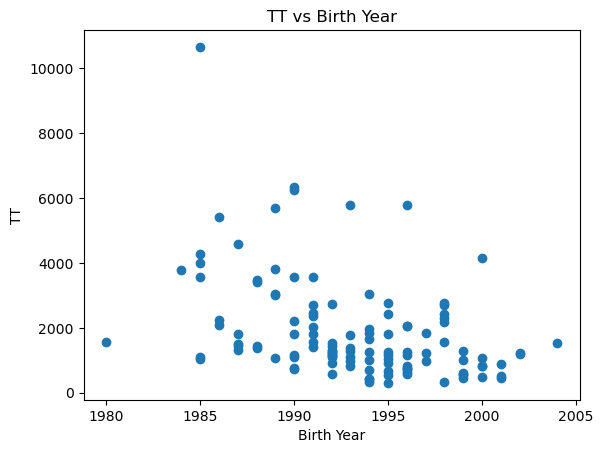

In [3]:
plt.scatter(df['birth_year'], df['tt'])
plt.xlabel('Birth Year')
plt.ylabel('TT')
plt.title('TT vs Birth Year')
plt.show()

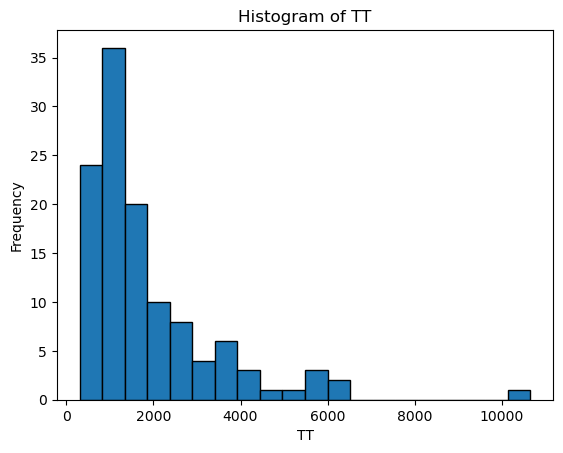

In [4]:
plt.hist(df['tt'], bins=20, edgecolor='black')
plt.xlabel('TT')
plt.ylabel('Frequency')
plt.title('Histogram of TT')
plt.show()

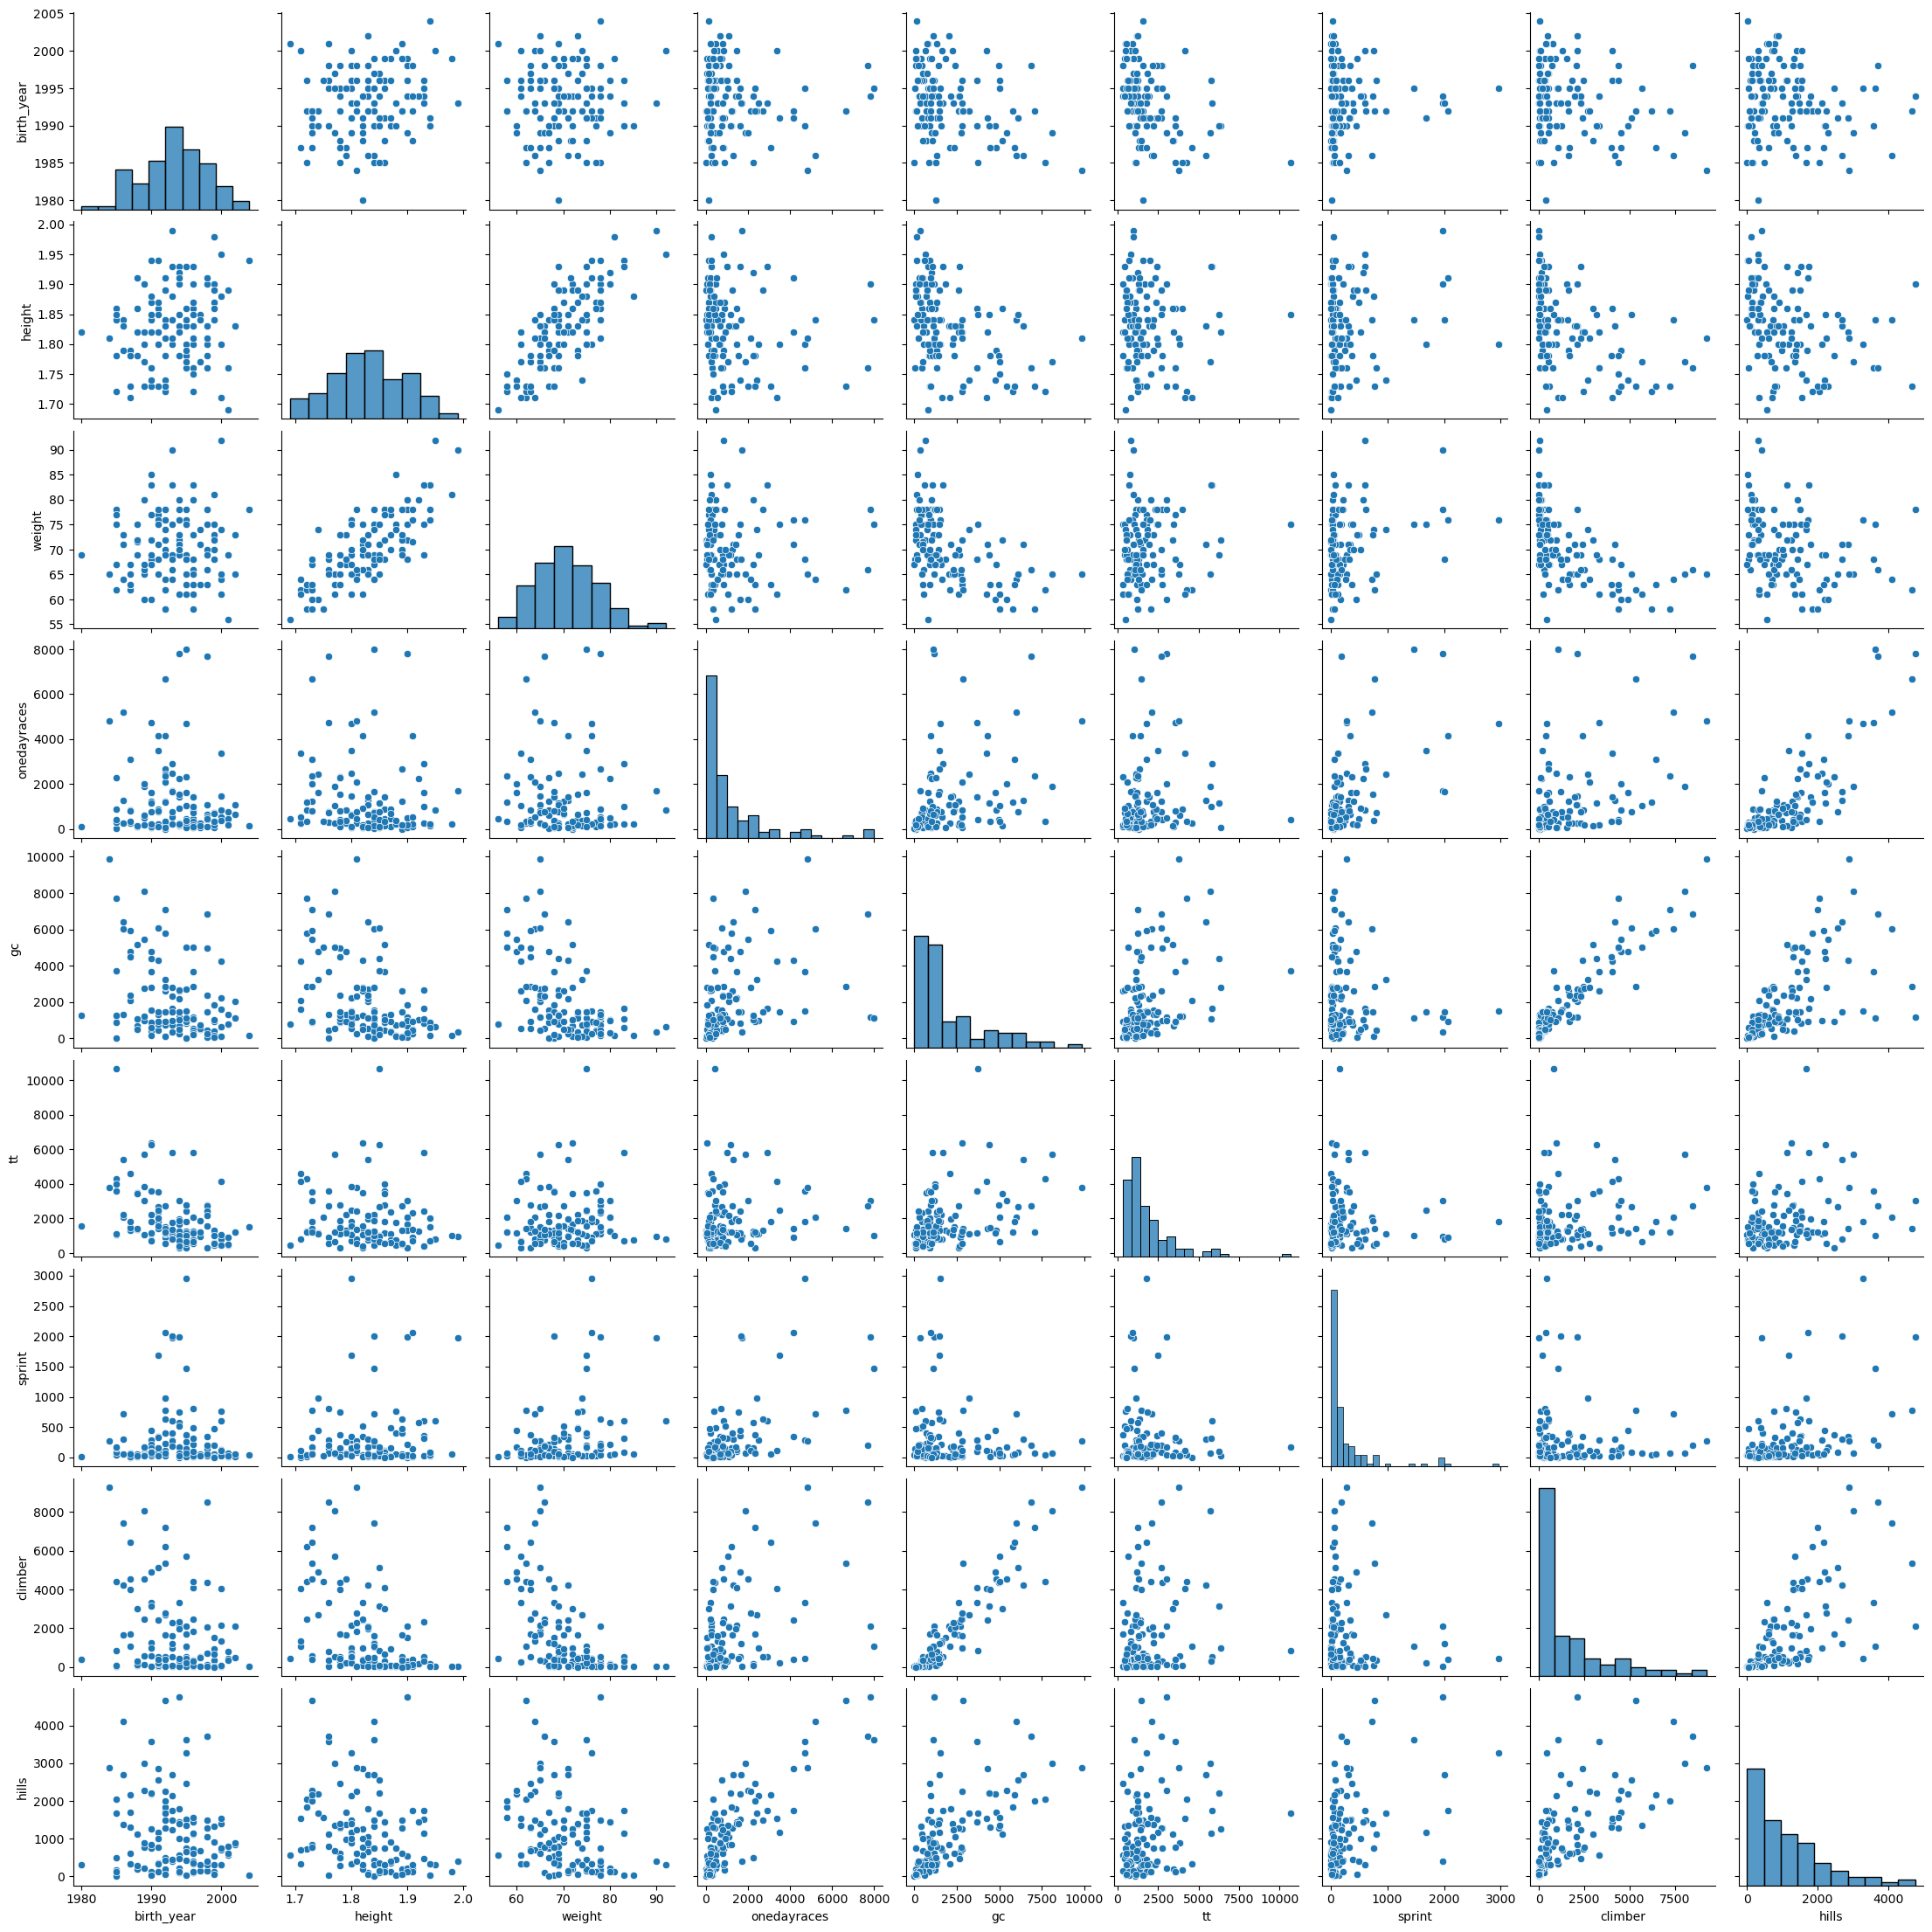

In [5]:
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

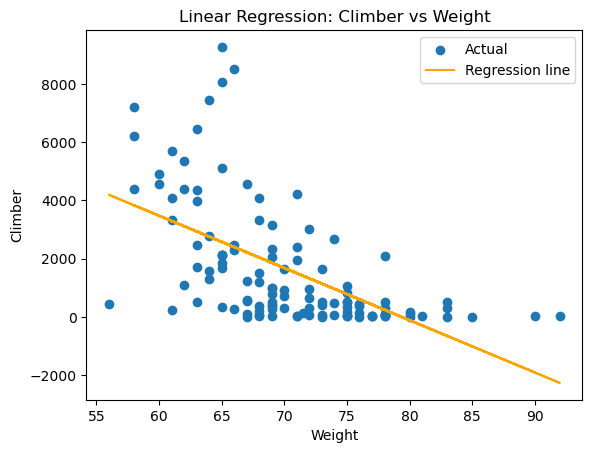

In [6]:
# Prepare the data
X = df[['weight']]
y = df['climber']

# Fit linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict values
y_pred = reg.predict(X)

# Plot
plt.scatter(df['weight'], df['climber'],label='Actual')
plt.plot(df['weight'], y_pred, color="orange", label='Regression line')
plt.xlabel('Weight')
plt.ylabel('Climber')
plt.title('Linear Regression: Climber vs Weight')
plt.legend()
plt.show()

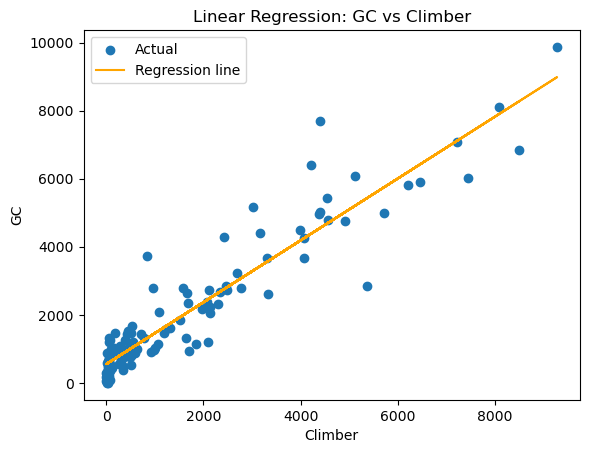

In [7]:
# Prepare the data
X = df[['climber']]
y = df['gc']

# Fit linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict values
y_pred = reg.predict(X)

# Plot
plt.scatter(df['climber'], df['gc'],label='Actual')
plt.plot(df['climber'], y_pred, color="orange", label='Regression line')
plt.xlabel('Climber')
plt.ylabel('GC')
plt.title('Linear Regression: GC vs Climber')
plt.legend()
plt.show()